In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams.update({
    'figure.figsize': (4.8, 2.7), 'font.size': 15, 'lines.linewidth': 2,
    'xtick.labelsize': 'small', 'ytick.labelsize': 'small',
    'axes.spines.top': False, 'axes.spines.right': False,
    'savefig.dpi': 100,
})

import numpy as np
from pathlib import Path
import os
from jarvis.utils import tqdm

FIG_DIR = Path('figures')
os.makedirs(FIG_DIR, exist_ok=True)
rng = np.random.default_rng()

# Compare gaze distribution among conditions

In [5]:
from hexarena import DATA_DIR
from hexarena.utils import load_monkey_data, align_monkey_data
from compute_beliefs import prepare_blocks, create_model

subject = 'viktor'
kappas = [0.02, 0.04, 0.08, 0.1]

env, _ = create_model(subject, 0., env_kw={'arena.resol': 4})
data_path = DATA_DIR/f'data_{subject}.mat'

In [12]:
probs = {}
for kappa in kappas:
    block_ids = prepare_blocks(DATA_DIR, subject, kappa)
    counts = np.zeros(env.arena.num_tiles)
    for session_id, block_idx in tqdm(block_ids, unit='session'):
        block_data = load_monkey_data(data_path, session_id, block_idx)
        block_data = align_monkey_data(block_data)
        env_data = env.convert_experiment_data(block_data)
        push = np.concatenate([[False], env_data['push']])
        vals = env_data['gaze'][~push]
        counts += np.histogram(vals, np.arange(env.arena.num_tiles+1)-0.5)[0]
    probs[kappa] = counts/counts.sum()

6 valid blocks found.


  0%|                                                                                                         …

7 valid blocks found.


  0%|                                                                                                         …

5 valid blocks found.


  0%|                                                                                                         …

7 valid blocks found.


  0%|                                                                                                         …

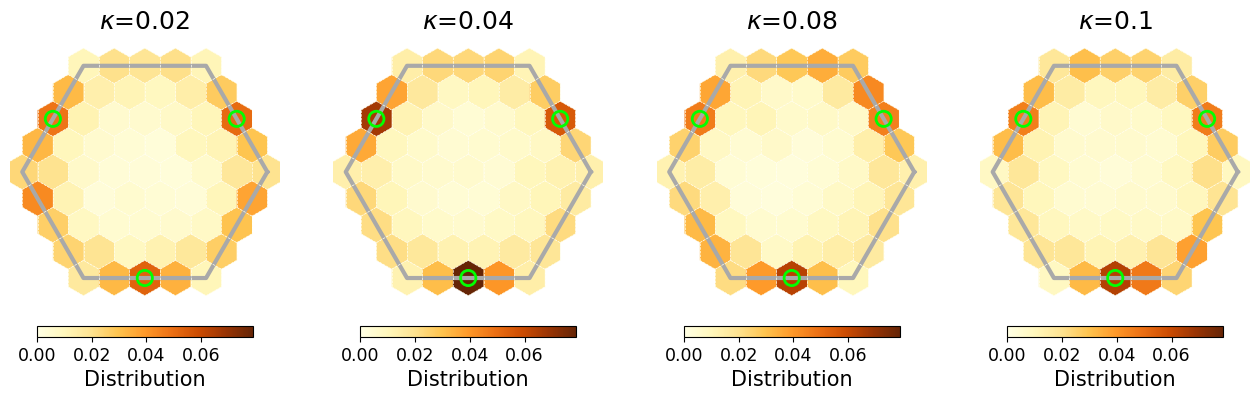

In [13]:
vmax = max(p.max() for p in probs.values())
fig, axes = plt.subplots(1, len(kappas), figsize=(4*len(kappas), 5))
for i, ax in enumerate(axes):
    env.arena.plot_map(ax, probs[kappas[i]], vmax=vmax, cbar_kw={'label': 'Distribution', 'location': 'bottom'})
    ax.set_title(r'$\kappa$='+str(kappas[i]))
fig.savefig(FIG_DIR/f'{subject}_pos.distribution.svg')